# **HANDWRITTEN DIGIT CLASSIFICATION**

**Step 1 - Import Liberaries**

In [10]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

**Step 2 - Train Test data import from Keras**

In [11]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print(f"No. of rows in trainging data : {len(X_train)}")
print(f"No. of rows in testing data : {X_test.shape[0]}")
print(f"shape of matrix : {X_test[0].shape}")

No. of rows in trainging data : 60000
No. of rows in testing data : 10000
shape of matrix : (28, 28)


**Step 3 - Visualise the data using matshow**

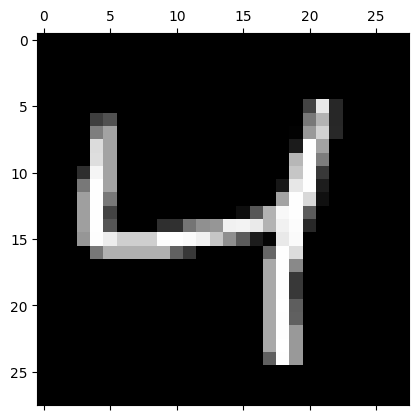

In [12]:
plt.matshow(X_train[2] , cmap='gray')

**Step  4- Flatten and Normalize the Training data**

In [13]:
X_train_flatten = X_train.reshape(len(X_train),28*28)/255.0
X_test_flatten = X_test.reshape(len(X_test),28*28)/255.0

print(f"after flatten both train and test data shape is : {X_train_flatten.shape} and {X_test_flatten.shape}")

after flatten both train and test data shape is : (60000, 784) and (10000, 784)


**Step  4- Building deep learning Model**

In [14]:
model = keras.Sequential([
    layers.Dense(10,input_shape=(28*28,),activation="sigmoid"), # 10 represent output classes Dense stand for connections btw input and outputlayer
]
)

# optimizers and loss are used to make model better
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train_flatten, y_train, epochs=5) # epochs is no. of times model will go through training data

Epoch 1/5


2025-05-27 10:37:27.535133: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 2ms/step - loss: 0.4685 - accuracy: 0.8782
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3040 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2836 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2728 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9258


**Step  5- Evaluating the Data on test data**

In [15]:
model.evaluate(X_test_flatten, y_test) # evaluate the model on test data

  1/313 [..............................] - ETA: 33s - loss: 0.2700 - accuracy: 0.9688

2025-05-27 10:37:51.676914: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 0.2646 - accuracy: 0.9245


[0.2646305561065674, 0.9244999885559082]

# Imrove the model using further analysis and adding more layers

In [16]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=model.predict(X_test_flatten).argmax(axis=1))
print(confusion_matrix)

313/313 [==============================] - 1s 2ms/step
tf.Tensor(
[[ 960    0    1    2    0    6    7    2    1    1]
 [   0 1113    3    2    0    2    4    2    9    0]
 [   4    8  924   18    8    6   12   10   38    4]
 [   3    0   17  924    0   26    2   12   18    8]
 [   1    1    4    1  907    0   12    4   10   42]
 [   7    2    3   34    8  784   17    3   26    8]
 [  11    3    9    1    8   15  906    2    3    0]
 [   1    5   22    7    9    1    0  947    2   34]
 [   7    9    7   22    9   31    9   12  861    7]
 [  11    7    1   10   23    9    0   24    5  919]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'True Label')

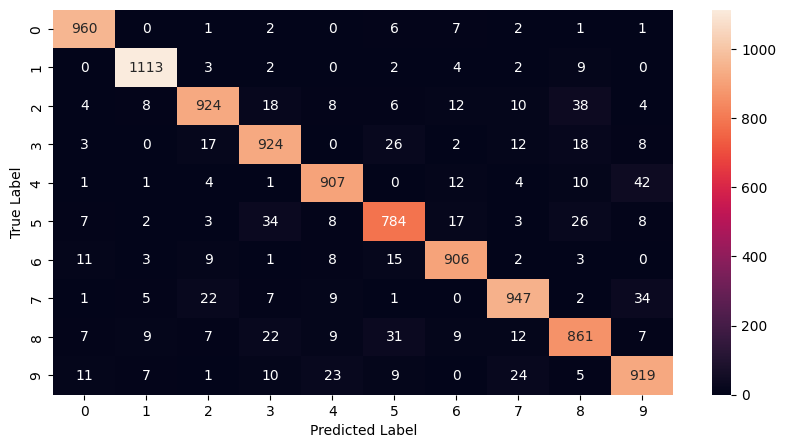

In [17]:
import seaborn as sns 
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


**Again Traing model with extra hidden Layer** 

In [18]:
model = keras.Sequential([
    layers.Dense(100,input_shape=(28*28,),activation="relu"), # 10 represent output classes Dense stand for connections btw input and outputlayer
    layers.Dense(10,activation="sigmoid") # 10 represent output classes Dense stand for connections btw input and outputlayer
]
)

# optimizers and loss are used to make model better
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train_flatten, y_train, epochs=5) # epochs is no. of times model will go through training data

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2712 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1209 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0851 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0657 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0510 - accuracy: 0.9843


In [19]:
model.evaluate(X_test_flatten, y_test) # evaluate the model on test data

313/313 [==============================] - 1s 2ms/step - loss: 0.0825 - accuracy: 0.9744


[0.08247022330760956, 0.974399983882904]

**Accuracy Increased by 4 % from 92 to 97** 

In [22]:
model.save("model")

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


# post training quantization

In [23]:
converter = tf.lite.TFLiteConverter.from_saved_model("model")
tflite_model = converter.convert()
len(tflite_model)


2025-05-27 10:42:28.762756: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2025-05-27 10:42:28.762806: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2025-05-27 10:42:28.764689: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: model
2025-05-27 10:42:28.765349: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-05-27 10:42:28.765363: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: model
2025-05-27 10:42:28.768828: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2025-05-27 10:42:28.769942: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2025-05-27 10:42:28.810324: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: model
2025-05-27 10:42:28.820605: I tensorflow

319724

In [24]:
converter = tf.lite.TFLiteConverter.from_saved_model("model")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()
len(tflite_quant_model)

2025-05-27 10:42:34.058707: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2025-05-27 10:42:34.058748: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2025-05-27 10:42:34.059021: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: model
2025-05-27 10:42:34.059690: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-05-27 10:42:34.059706: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: model
2025-05-27 10:42:34.061255: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2025-05-27 10:42:34.094745: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: model
2025-05-27 10:42:34.105038: I tensorflow/cc/saved_model/loader.cc:316] SavedModel load for tags { serve }; Status: success: OK. Took 46018 microseconds.
Summary on the non-c

84624

# Quantization aware training 

In [26]:
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model
quant_aware_model = quantize_model(model)

quant_aware_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

quant_aware_model.summary()

ValueError: Unable to clone model. This generally happens if you used custom Keras layers or objects in your model. Please specify them via `quantize_scope` for your calls to `quantize_model` and `quantize_apply`. [Layer <tf_keras.src.layers.core.dense.Dense object at 0x7140a43baa00> supplied to wrapper is not a supported layer type. Please ensure wrapped layer is a valid Keras layer.].

In [ ]:
quant_aware_model.fit(X_train,y_train , epochs = 1)
quant_aware_model.evaluate(X_test,y_test)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(quant_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_aware_model = converter.convert()


In [ ]:
with open ("tflite_quant_aware_model.tflite" ,"wb") as f : 
    f.write(tflite_quant_aware_mode)